HHI 06/2012

In [6]:
import pandas as pd

req = requests.get(ifdata)
info = req.json()

df_info = pd.read_csv('dados/Carteirapf_201206.csv', sep=';')



In [7]:
df_info_livre_2 = df_info[(df_info['Grupo'] == 'Empréstimo com Consignação em Folha') | (df_info['Grupo'] == 'Empréstimo sem Consignação em Folha') | (df_info['Grupo'] == 'Cartão de Crédito') | (df_info['Grupo'] == 'Outros Créditos')]

df_Ativo_total = df_info_livre_2[df_info_livre_2['NomeColuna'] == 'Total']

Ativo_total = df_Ativo_total['Saldo'].sum()

df_mktsh = pd.DataFrame(df_Ativo_total.groupby('CodInst')['Saldo'].sum())
df_mktsh['MarketShare'] = (df_mktsh['Saldo'] / Ativo_total)
df_mktsh['MarketShare^2'] = (df_mktsh['MarketShare'] ** 2)

HHI = df_mktsh['MarketShare^2'].sum() * 10000

print(HHI)

KeyError: 'Grupo'

HHI 06/2024

In [9]:
import requests
import pandas as pd

ifdata = 'https://olinda.bcb.gov.br/olinda/servico/IFDATA/versao/v1/odata/IfDataValores(AnoMes=@AnoMes,TipoInstituicao=@TipoInstituicao,Relatorio=@Relatorio)?@AnoMes=202406&@TipoInstituicao=2&@Relatorio=\'11\'&$top=100000&$format=json&$select=TipoInstituicao,CodInst,AnoMes,NomeRelatorio,NumeroRelatorio,Grupo,Conta,NomeColuna,DescricaoColuna,Saldo'

req = requests.get(ifdata)
info = req.json()

df_info = pd.DataFrame(info['value'])

df_info_06 = df_info[(df_info['Grupo'] == 'Empréstimo com Consignação em Folha') | (df_info['Grupo'] == 'Empréstimo sem Consignação em Folha') | (df_info['Grupo'] == 'Cartão de Crédito') | (df_info['Grupo'] == 'Outros Créditos')]

df_Ativo_total06 = df_info_06[df_info_06['NomeColuna'] == 'Total']

Ativo_total = df_Ativo_total06['Saldo'].sum()

df_mktsh06 = pd.DataFrame(df_Ativo_total06.groupby('CodInst')['Saldo'].sum())
df_mktsh06['MarketShare'] = (df_mktsh06['Saldo'] / Ativo_total)
df_mktsh06['MarketShare^2'] = (df_mktsh06['MarketShare'] ** 2)

HHI06 = df_mktsh06['MarketShare^2'].sum() * 10000

print(HHI06)

833.6713559482235


HHI 06/2018

In [10]:
import requests
import pandas as pd

ifdata = 'https://olinda.bcb.gov.br/olinda/servico/IFDATA/versao/v1/odata/IfDataValores(AnoMes=@AnoMes,TipoInstituicao=@TipoInstituicao,Relatorio=@Relatorio)?@AnoMes=201806&@TipoInstituicao=2&@Relatorio=\'11\'&$top=100000&$format=json&$select=TipoInstituicao,CodInst,AnoMes,NomeRelatorio,NumeroRelatorio,Grupo,Conta,NomeColuna,DescricaoColuna,Saldo'

req = requests.get(ifdata)
info = req.json()

df_info = pd.DataFrame(info['value'])

df_info_1806 = df_info[(df_info['Grupo'] == 'Empréstimo com Consignação em Folha') | (df_info['Grupo'] == 'Empréstimo sem Consignação em Folha') | (df_info['Grupo'] == 'Cartão de Crédito') | (df_info['Grupo'] == 'Outros Créditos')]

df_Ativo_total1806 = df_info_1806[df_info_1806['NomeColuna'] == 'Total']

Ativo_total = df_Ativo_total1806['Saldo'].sum()

df_mktsh1806 = pd.DataFrame(df_Ativo_total1806.groupby('CodInst')['Saldo'].sum())
df_mktsh1806['MarketShare'] = (df_mktsh1806['Saldo'] / Ativo_total)
df_mktsh1806['MarketShare^2'] = (df_mktsh1806['MarketShare'] ** 2)

HHI1806 = df_mktsh1806['MarketShare^2'].sum() * 10000

print(HHI1806)

1192.8242688380294


HHI 06/2016

In [ ]:
import requests
import pandas as pd

ifdata = 'https://olinda.bcb.gov.br/olinda/servico/IFDATA/versao/v1/odata/IfDataValores(AnoMes=@AnoMes,TipoInstituicao=@TipoInstituicao,Relatorio=@Relatorio)?@AnoMes=201606&@TipoInstituicao=2&@Relatorio=\'11\'&$top=100000&$format=json&$select=TipoInstituicao,CodInst,AnoMes,NomeRelatorio,NumeroRelatorio,Grupo,Conta,NomeColuna,DescricaoColuna,Saldo'

req = requests.get(ifdata)
info = req.json()

df_info = pd.DataFrame(info['value'])

df_info_1606 = df_info[(df_info['Grupo'] == 'Empréstimo com Consignação em Folha') | (df_info['Grupo'] == 'Empréstimo sem Consignação em Folha') | (df_info['Grupo'] == 'Cartão de Crédito') | (df_info['Grupo'] == 'Outros Créditos')]

df_Ativo_total1606 = df_info_1606[df_info_1606['NomeColuna'] == 'Total']

Ativo_total = df_Ativo_total1606['Saldo'].sum()

df_mktsh1606 = pd.DataFrame(df_Ativo_total1606.groupby('CodInst')['Saldo'].sum())
df_mktsh1606['MarketShare'] = (df_mktsh1606['Saldo'] / Ativo_total)
df_mktsh1606['MarketShare^2'] = (df_mktsh1606['MarketShare'] ** 2)

HHI1606 = df_mktsh1606['MarketShare^2'].sum() * 10000

print(HHI1606)

1245.3721415870136


Juntando os arquivos do COSIF da conta OPERAÇÕES DE CRÉDITO em apenas um com todos os dados


In [116]:
import pandas as pd
import os


def juntar_csvs_filtrando(caminho_da_pasta, nome_coluna, valor_filtro, nome_documento='DOCUMENTO', valor_documento=4010):
    todos_dataframes_filtrados = []

    # Verificar se o caminho da pasta existe
    if not os.path.isdir(caminho_da_pasta):
        print(f"Erro: O caminho da pasta '{caminho_da_pasta}' não existe.")
        return pd.DataFrame()

    # Listar todos os arquivos na pasta
    arquivos_na_pasta = os.listdir(caminho_da_pasta)

    # Filtrar apenas arquivos CSV
    arquivos_csv = [f for f in arquivos_na_pasta if f.lower().endswith('.csv')]

    if not arquivos_csv:
        print(f"Nenhum arquivo CSV encontrado na pasta: '{caminho_da_pasta}'")
        return pd.DataFrame()

    print(f"Arquivos CSV encontrados: {arquivos_csv}")

    for arquivo_csv in arquivos_csv:
        caminho_completo_arquivo = os.path.join(caminho_da_pasta, arquivo_csv)
        print(f"Processando arquivo: {arquivo_csv}")

        try:
            # Tenta ler o arquivo CSV
            df_temp = pd.read_csv(caminho_completo_arquivo, sep=';', encoding='latin1', skiprows=3, decimal=',', on_bad_lines='warn')

            # Verificar se a coluna de filtro existe no DataFrame
            if nome_coluna in df_temp.columns and nome_documento in df_temp.columns:
                df_temp[nome_documento] = pd.to_numeric(df_temp[nome_documento], errors='coerce')

                df_filtrado = df_temp[
                    (df_temp[nome_coluna] == valor_filtro) &
                    (df_temp[nome_documento] == valor_documento)
                ].copy()

                if not df_filtrado.empty:
                    todos_dataframes_filtrados.append(df_filtrado)
                    print(f"  - {len(df_filtrado)} linhas adicionadas do arquivo {arquivo_csv}.")
                
                else:
                    print(f"  - Nenhuma linha corresponde aos filtros em {arquivo_csv}.")

            else:
                missing_cols = []
                if nome_coluna not in df_temp.columns:
                    missing_cols.append(nome_coluna)
                if nome_documento not in df_temp.columns:
                    missing_cols.append(nome_documento)
                print(f"  - Coluna(s) {', '.join(missing_cols)} não encontrada(s) no arquivo {arquivo_csv}. Pulando este arquivo.")

        except pd.errors.EmptyDataError:
            print(f"Erro: O arquivo '{arquivo_csv}' está vazio. Ignorando.")
        except Exception as e:
            print(f"Erro ao ler ou processar '{arquivo_csv}': {e}")

    if todos_dataframes_filtrados:
        # Concatenar todos os DataFrames filtrados
        df_final = pd.concat(todos_dataframes_filtrados, ignore_index=True)
        print("\nProcessamento concluído. DataFrame final criado.")
        return df_final
    else:
        print("\nNenhum dado correspondente ao filtro foi encontrado em nenhum arquivo.")
        return pd.DataFrame()
    

operações_de_crédito_bancos = juntar_csvs_filtrando('dados/dados_bancos',
                                          nome_coluna='CONTA',
                                          valor_filtro=16000001)

operações_de_crédito_sociedades = juntar_csvs_filtrando('dados/dados_sociedades',
                                          nome_coluna='CONTA',
                                          valor_filtro=16000001)

operações_de_crédito_cooperativas = juntar_csvs_filtrando('dados/dados_cooperativas',
                                          nome_coluna='CONTA',
                                          valor_filtro=16000001)


Arquivos CSV encontrados: ['201209BANCOS.CSV', '202503BANCOS.CSV', '202103BANCOS.CSV', '202005BANCOS.CSV', '202101BANCOS.CSV', '202111BANCOS.CSV', '202402BANCOS.CSV', '201906BANCOS.CSV', '202112BANCOS.CSV', '202406BANCOS.CSV', '201303BANCOS.CSV', '201903BANCOS.CSV', '201707BANCOS.CSV', '201811BANCOS.CSV', '201002BANCOS.CSV', '202308BANCOS.CSV', '201306BANCOS.CSV', '201309BANCOS.CSV', '201307BANCOS.CSV', '201202BANCOS.CSV', '202207BANCOS.CSV', '201508BANCOS.CSV', '201003BANCOS.CSV', '201201BANCOS.CSV', '202410BANCOS.CSV', '201609BANCOS.CSV', '201607BANCOS.CSV', '201910BANCOS.CSV', '201905BANCOS.CSV', '201501BANCOS.CSV', '201109BANCOS.CSV', '202110BANCOS.CSV', '201809BANCOS.CSV', '201412BANCOS.CSV', '201602BANCOS.CSV', '201709BANCOS.CSV', '201502BANCOS.CSV', '202106BANCOS.CSV', '201603BANCOS.CSV', '201708BANCOS.CSV', '201101BANCOS.CSV', '202311BANCOS.CSV', '201512BANCOS.CSV', '201504BANCOS.CSV', '202404BANCOS.CSV', '201704BANCOS.CSV', '201511BANCOS.CSV', '201205BANCOS.CSV', '201102BANCOS

In [124]:
operações_de_crédito = pd.concat([operações_de_crédito_bancos, operações_de_crédito_sociedades, operações_de_crédito_cooperativas], ignore_index=True)

operações_de_crédito['#DATA_BASE'] = operações_de_crédito['#DATA_BASE'].fillna(operações_de_crédito['DATA'])
operações_de_crédito['NOME_INSTITUICAO'] = operações_de_crédito['NOME_INSTITUICAO'].fillna(operações_de_crédito['NOME_INSTITUICAO'])
operações_de_crédito['NOME_CONTA'] = operações_de_crédito['NOME_CONTA'].fillna(operações_de_crédito['NOME CONTA'])
operações_de_crédito['SALDO'] = operações_de_crédito['SALDO'].fillna(operações_de_crédito['SALDO                                                                                                  '])

# Opcional: Remover as colunas originais se não forem mais necessárias
operações_de_crédito = operações_de_crédito.drop(columns=['DATA', 'NOME CONTA', 'NOME INSTITUICAO', 'SALDO                                                                                                  '])

operações_de_crédito.to_csv('dados/operações_de_crédito.csv', index=True)

Calculando o HHI para o estoque de crédito dos bancos mês a mês

In [125]:
#Tirando os dados do BNDES
#operações_de_crédito = operações_de_crédito[operações_de_crédito['CNPJ'] != 33657248].copy ()

operações_de_crédito['N'] = operações_de_crédito.groupby('#DATA_BASE').transform('size')

operações_de_crédito['total_market'] = operações_de_crédito.groupby('#DATA_BASE')['SALDO'].transform('sum')

operações_de_crédito['market_share'] = operações_de_crédito['SALDO'] / operações_de_crédito['total_market']

operações_de_crédito['market_share_squared'] = operações_de_crédito['market_share']**2

HHI = pd.DataFrame(operações_de_crédito.groupby(['#DATA_BASE'])['market_share_squared'].sum().reset_index())
HHI = HHI.rename(columns={'market_share_squared': 'HHI'})

contagem_por_data = operações_de_crédito['#DATA_BASE'].value_counts().reset_index()
contagem_por_data.columns = ['#DATA_BASE', 'N']
HHI = pd.merge(HHI, contagem_por_data, on='#DATA_BASE', how='left')

HHI['#DATA_BASE'] = HHI['#DATA_BASE'].astype(int).astype(str)

HHI['Data_Completa'] = pd.to_datetime(HHI['#DATA_BASE'], format='%Y%m')
HHI['Date'] = HHI['Data_Completa'].dt.strftime('%B/%Y')

HHI['HHIn'] = (HHI['HHI']-1/HHI['N']) / (1-1/HHI['N'])


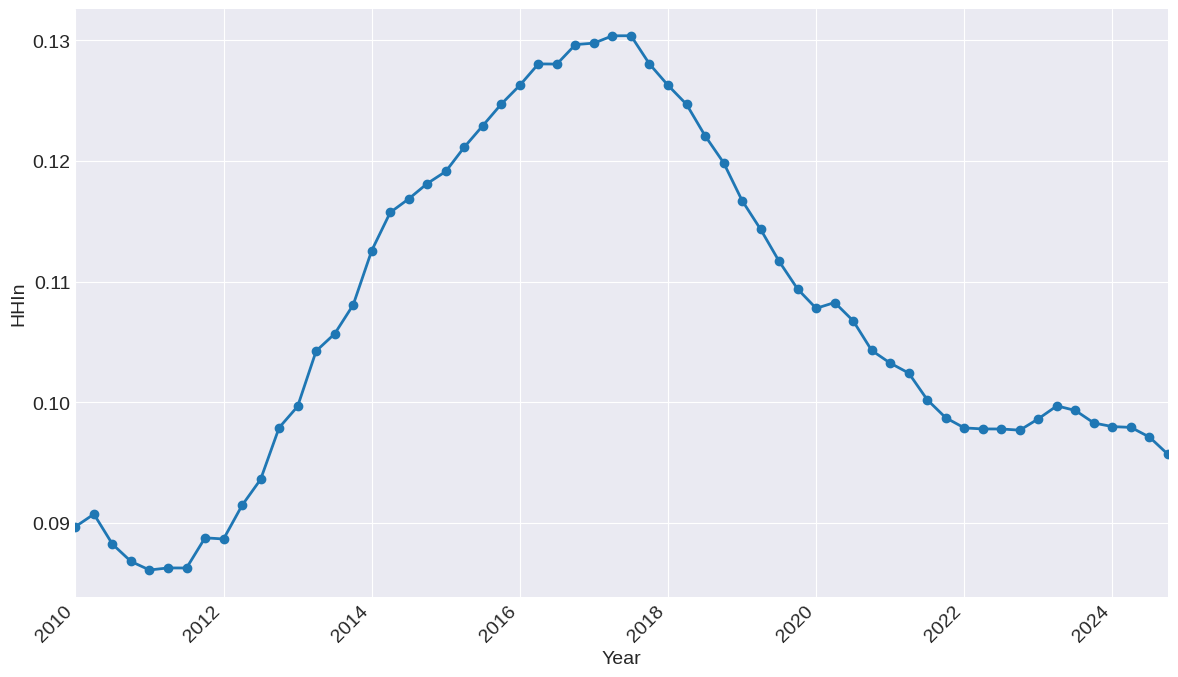

In [221]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Importar para formatação de datas
import seaborn as sns # Para um visual mais agradável, opcional

#HHI[HHI['Date'].str.contains('December')]
months = ['March', 'June', 'September', 'December']
HHI_trimestral = HHI[HHI['Date'].str.contains('|'.join(months))].copy()
HHI_trimestral['#DATA_BASE'] = HHI_trimestral['#DATA_BASE'].str[:-2]

HHI_trimestral = HHI_trimestral.set_index('Data_Completa')
HHI_trimestral = HHI_trimestral.sort_index()

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 14

#plt.scatter(HHI_trimestral['Date'], HHI_trimestral['HHIn'], color='blue', marker='o', s=50)
#plt.figure(figsize=(12, 6))
HHI_trimestral['HHIn'].plot(marker='o', linestyle='-', markersize=6, linewidth=2)
plt.xlabel('Year')
plt.ylabel('HHIn')
plt.grid(True)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right')
# Ajustar o layout para evitar que os rótulos sejam cortados
plt.tight_layout()
plt.show()


In [103]:
operações_de_crédito_bancos['#DATA_BASE'] = operações_de_crédito_bancos['#DATA_BASE'].fillna(operações_de_crédito_bancos['DATA'])
operações_de_crédito_bancos['NOME_INSTITUICAO'] = operações_de_crédito_bancos['NOME_INSTITUICAO'].fillna(operações_de_crédito_bancos['NOME_INSTITUICAO'])
operações_de_crédito_bancos['NOME_CONTA'] = operações_de_crédito_bancos['NOME_CONTA'].fillna(operações_de_crédito_bancos['NOME CONTA'])
operações_de_crédito_bancos['SALDO'] = operações_de_crédito_bancos['SALDO'].fillna(operações_de_crédito_bancos['SALDO                                                                                                  '])

# Opcional: Remover as colunas originais se não forem mais necessárias
operações_de_crédito_bancos = operações_de_crédito_bancos.drop(columns=['DATA', 'NOME CONTA', 'NOME INSTITUICAO', 'SALDO                                                                                                  '])

operações_de_crédito_bancos.to_csv('dados/operações_de_crédito_bancos.csv', index=True)


In [104]:

operações_de_crédito_bancos['N'] = operações_de_crédito_bancos.groupby('#DATA_BASE').transform('size')

operações_de_crédito_bancos['total_market'] = operações_de_crédito_bancos.groupby('#DATA_BASE')['SALDO'].transform('sum')

operações_de_crédito_bancos['market_share'] = operações_de_crédito_bancos['SALDO'] / operações_de_crédito_bancos['total_market']

operações_de_crédito_bancos['market_share_squared'] = operações_de_crédito_bancos['market_share']**2

HHI = pd.DataFrame(operações_de_crédito_bancos.groupby(['#DATA_BASE'])['market_share_squared'].sum().reset_index())
HHI = HHI.rename(columns={'market_share_squared': 'HHI'})

contagem_por_data = operações_de_crédito_bancos['#DATA_BASE'].value_counts().reset_index()
contagem_por_data.columns = ['#DATA_BASE', 'N']
HHI = pd.merge(HHI, contagem_por_data, on='#DATA_BASE', how='left')

HHI['#DATA_BASE'] = HHI['#DATA_BASE'].astype(int).astype(str)

HHI['Data_Completa'] = pd.to_datetime(HHI['#DATA_BASE'], format='%Y%m')
HHI['Date'] = HHI['Data_Completa'].dt.strftime('%B/%Y')

HHI['HHIn'] = (HHI['HHI']-1/HHI['N']) / (1-1/HHI['N'])

/tmp/ipykernel_1829/1112414995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HHI_december['#DATA_BASE'] = HHI_december['#DATA_BASE'].str[:-2]


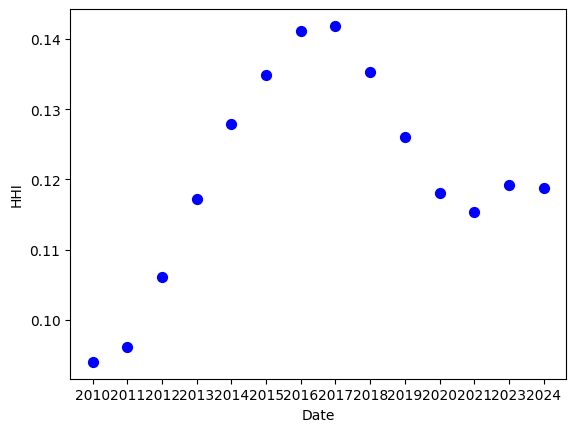

In [105]:
HHI_december = HHI[HHI['Date'].str.contains('December')]
HHI_december['#DATA_BASE'] = HHI_december['#DATA_BASE'].str[:-2]

plt.scatter(HHI_december['#DATA_BASE'], HHI_december['HHIn'], color='blue', marker='o', s=50)
#plt.figure(figsize=(12, 6))
#HHI['HHI'].plot()
plt.xlabel('Date')
plt.ylabel('HHI')
#plt.grid(True)
plt.show()